In [1]:
import torch
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,)),
    ]
)

**Explanation:**

1. **Load MNIST Training Dataset:**
   - `trainset = datasets.MNIST('data', download=True, train=True, transform=transform)`: Loads the MNIST training dataset.
     - `'data'`: Specifies the directory to store the dataset.
     - `download=True`: Downloads the dataset if not already present.
     - `train=True`: Indicates that this is the training set.
     - `transform=transform`: Applies the specified transformations to the training data.

2. **Load MNIST Validation Dataset:**
   - `valset = datasets.MNIST('data', download=True, train=False, transform=transform)`: Loads the MNIST validation dataset.
     - `'data'`: Same as in the training dataset.
     - `download=True`: Downloads the dataset if not already present.
     - `train=False`: Indicates that this is the validation set.
     - `transform=transform`: Applies the same transformations as in the training set.

3. **Create DataLoader for Training Set:**
   - `trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)`: Creates a DataLoader for the training set.
     - `trainset`: The training dataset to be loaded.
     - `batch_size=64`: Specifies the number of samples in each batch.
     - `shuffle=True`: Randomly shuffles the data at the beginning of each epoch.

4. **Create DataLoader for Validation Set:**
   - `valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)`: Creates a DataLoader for the validation set.
     - `valset`: The validation dataset to be loaded.
     - `batch_size=64`: Specifies the number of samples in each batch.
     - `shuffle=True`: Randomly shuffles the data at the beginning of each epoch.

These DataLoader objects (`trainloader` and `valloader`) allow efficient iteration over the training and validation datasets in batches, which is essential for training and evaluating machine learning models.

In [4]:
# Load the MNIST training dataset
trainset = datasets.MNIST('data', download=True, train=True, transform=transform)

# Load the MNIST validation dataset
valset = datasets.MNIST('data', download=True, train=False, transform=transform)

# Create DataLoader for training set
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Create DataLoader for validation set
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

**Explanation:**

1. **Create an Iterator:**
   - `dataiter = iter(trainloader)`: Creates an iterator from the training DataLoader (`trainloader`). This iterator allows you to fetch batches of data using the `next` function.

2. **Fetch a Batch of Data:**
   - `images, labels = next(dataiter)`: Fetches the next batch of data from the iterator. `images` is a tensor containing the input images, and `labels` is a tensor containing the corresponding labels.

3. **Print the Shape of the Images Tensor:**
   - `print(images.shape)`: Prints the shape of the `images` tensor. The shape typically looks like `(batch_size, channels, height, width)`.

4. **Print the Shape of the Labels Tensor:**
   - `print(labels.shape)`: Prints the shape of the `labels` tensor. The shape typically looks like `(batch_size,)`.

This code snippet is useful for understanding the structure of the input data in a batch. The shapes of the tensors provide information about the batch size, the number of channels in each image, and the dimensions of the images. The labels tensor typically has a shape representing the batch size, indicating the number of labels corresponding to the images in the batch.

In [5]:
# Create an iterator for the training DataLoader
dataiter = iter(trainloader)

# Get the next batch of data from the iterator
images, labels = next(dataiter)

# Print the shape of the images tensor
print(images.shape)

# Print the shape of the labels tensor
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


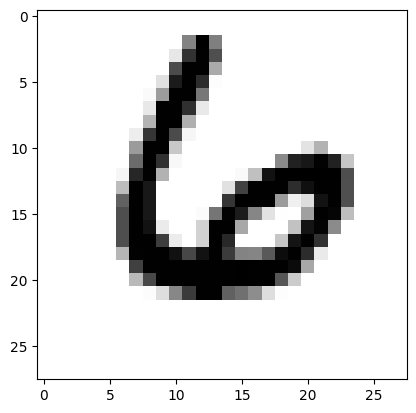

In [6]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')

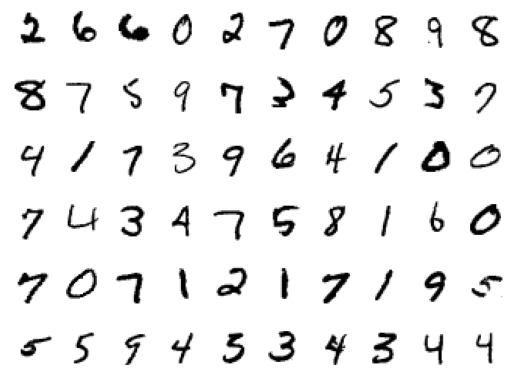

In [7]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis("off")
    plt.imshow(images[index].numpy().squeeze(), cmap="gray_r")

**Explanation:**

1. **Convolutional Layers (`layer0` and `layer1`):**
   - `nn.Conv2d`: Convolutional layer with specified input and output channels, kernel size, and padding.
   - `nn.BatchNorm2d`: Batch normalization layer after convolution.
   - `nn.ReLU`: Rectified Linear Unit (ReLU) activation function applied after batch normalization.

2. **Fully Connected Layers (`layer2`, `layer3`, `output_layer`):**
   - `nn.Linear`: Fully connected layers with specified input and output features.
   - `nn.BatchNorm1d`: Batch normalization for fully connected layers.
   - `nn.init.kaiming_normal_`: Initializes weights using Kaiming normal initialization for improved convergence.

3. **Forward Method:**
   - `forward`: Defines the forward pass of the model.
   - Convolutional and batch normalization layers are applied sequentially.
   - The input is reshaped (`view`) before passing through fully connected layers.
   - ReLU activation is applied after each fully connected layer.
   - The final output is obtained through the output layer.

4. **Initialization of Weights:**
   - Weights of fully connected layers are initialized using Kaiming normal initialization.

5. **Instantiation and Printing the Model:**
   - An instance of the `ClassificationCNN` model is created.
   - `print(model)`: Displays the architecture of the model.

This CNN architecture is designed for image classification tasks with 10 output classes. Make sure to adjust the output layer based on the number of classes in your specific classification problem.

In [8]:
class ClassificationCNN(nn.Module):
    def __init__(self):
        super(ClassificationCNN, self).__init__()

        # Convolutional layer 0
        self.layer0 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3, padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(),
        )

        # Convolutional layer 1
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=4, kernel_size=3, padding=1),
            nn.BatchNorm2d(4),
            nn.ReLU(),
        )

        # Fully connected layer 2
        self.layer2 = nn.Linear(in_features=3136, out_features=128)
        self.bn2 = nn.BatchNorm1d(128)
        nn.init.kaiming_normal_(self.layer2.weight, mode='fan_out', nonlinearity='relu')

        # Fully connected layer 3
        self.layer3 = nn.Linear(in_features=128, out_features=64)
        self.bn3 = nn.BatchNorm1d(64)
        nn.init.kaiming_normal_(self.layer3.weight, mode='fan_out', nonlinearity='relu')

        # Output layer
        self.output_layer = nn.Linear(in_features=64, out_features=10)
        nn.init.kaiming_normal_(self.layer3.weight, mode='fan_out', nonlinearity='sigmoid')

    def forward(self, x):
        out = self.layer0(x)
        out = self.layer1(out)

        out = out.view(out.size(0), -1)

        out = self.layer2(out)
        out = self.bn2(out)
        out = nn.ReLU()(out)

        out = self.layer3(out)
        out = self.bn3(out)
        out = nn.ReLU()(out)

        out = self.output_layer(out)
        out = nn.ReLU()(out)

        return out

# Instantiate the model
model = ClassificationCNN()

# Display the model architecture
print(model)


ClassificationCNN(
  (layer0): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer1): Sequential(
    (0): Conv2d(8, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer2): Linear(in_features=3136, out_features=128, bias=True)
  (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer3): Linear(in_features=128, out_features=64, bias=True)
  (bn3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (output_layer): Linear(in_features=64, out_features=10, bias=True)
)


**Explanation:**

1. **Define the CrossEntropyLoss:**
   - `criterion = nn.CrossEntropyLoss()`: Creates an instance of the CrossEntropyLoss class. This loss function is commonly used for classification problems.

2. **Get a Batch of Images and Labels:**
   - `images, labels = next(iter(trainloader))`: Uses `iter(trainloader)` to create an iterator and `next()` to get the next batch of images and labels from the training loader (`trainloader`). This is a single iteration over the training dataset.

3. **Forward Pass - Model Prediction:**
   - `logps = model(images)`: Passes the batch of images through the model to obtain log probabilities (`logps`). The model predicts the likelihood of each class for each image in the batch.

4. **Calculate CrossEntropyLoss:**
   - `loss = criterion(logps, labels)`: Computes the CrossEntropyLoss between the predicted log probabilities (`logps`) and the true labels (`labels`). The CrossEntropyLoss takes care of applying the softmax function to the model's output and computing the negative log likelihood.

5. **Display the Calculated Loss:**
   - `print(loss)`: Outputs the calculated loss. This value represents how well the model's predictions align with the true labels. Lower values indicate better alignment.

This code snippet is a standard procedure for calculating the loss during the training process of a classification model. The CrossEntropyLoss is commonly used for such tasks, and its calculation involves both the model's predictions and the true labels. The goal during training is to minimize this loss through the optimization process.

In [9]:
# Define the CrossEntropyLoss
criterion = nn.CrossEntropyLoss()

# Get a batch of images and labels from the training loader
images, labels = next(iter(trainloader))

# Forward pass: calculate the log probabilities using the model
logps = model(images)

# Calculate the CrossEntropyLoss
loss = criterion(logps, labels)

# Display the calculated loss for untrained model
print(loss)


tensor(2.2670, grad_fn=<NllLossBackward0>)


**Explanation:**

1. **Optimizer Initialization:**
   - `optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)`: Initializes the SGD optimizer with a learning rate of 0.003 and momentum of 0.9. The optimizer will update the model parameters during training.

2. **Training Loop:**
   - `for e in range(epochs):`: Iterates over the specified number of training epochs.

3. **Batch Iteration:**
   - `for images, labels in trainloader:`: Iterates over batches of images and labels from the training loader (`trainloader`).

4. **Training Pass:**
   - `optimizer.zero_grad()`: Clears the accumulated gradients from the previous iteration.
   - `output = model(images)`: Forward pass to obtain model predictions.
   - `loss = criterion(output, labels)`: Calculates the loss between predicted and true labels.

5. **Backpropagation and Optimization:**
   - `loss.backward()`: Computes gradients of the loss with respect to the model parameters using backpropagation.
   - `optimizer.step()`: Updates the model parameters using the optimizer's update rule (SGD with momentum).

6. **Epoch Completion:**
   - `else:`: Executes after each complete epoch.
   - `print("Epoch {} - Training loss: {}".format(e, running_loss / len(trainloader)))`: Displays the average training loss for the epoch.

7. **Total Training Time:**
   - `print("\nTraining Time (in minutes) =", (time() - time0) / 60)`: Displays the total training time in minutes.

This training loop iterates over the dataset for the specified number of epochs, updating the model weights based on the computed gradients and minimizing the loss. The training loss is printed at the end of each epoch. Adjustments and additional monitoring, such as validation loss evaluation, could be added based on specific requirements.

In [26]:
# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)

# Record the starting time
time0 = time()

# Number of training epochs
epochs = 15

# Set the model to training mode
model.train()

# Training loop
for e in range(epochs):
    running_loss = 0
    
    # Iterate over batches in the training loader
    for images, labels in trainloader:
        # Training pass
        optimizer.zero_grad()  # Clear accumulated gradients
        
        output = model(images)  # Forward pass
        loss = criterion(output, labels)  # Calculate the loss
        
        # Backpropagation and optimization
        loss.backward()  # Backward pass
        optimizer.step()  # Update model weights
        
        running_loss += loss.item()
    
    else:
        # Print training loss at the end of each epoch
        print("Epoch {} - Training loss: {}".format(e, running_loss / len(trainloader)))

# Display total training time
print("\nTraining Time (in minutes) =", (time() - time0) / 60)


Epoch 0 - Training loss: 0.7297927755187316
Epoch 1 - Training loss: 0.19211879156148637
Epoch 2 - Training loss: 0.13420220606052863
Epoch 3 - Training loss: 0.10524863208820825
Epoch 4 - Training loss: 0.08995508365849378
Epoch 5 - Training loss: 0.08043226608331365
Epoch 6 - Training loss: 0.07005516165988579
Epoch 7 - Training loss: 0.06407727337063057
Epoch 8 - Training loss: 0.05820033697387589
Epoch 9 - Training loss: 0.053035053117240445
Epoch 10 - Training loss: 0.049839464645497183
Epoch 11 - Training loss: 0.04512691171144816
Epoch 12 - Training loss: 0.04337951306602173
Epoch 13 - Training loss: 0.03974403968767952
Epoch 14 - Training loss: 0.03797023703030416

Training Time (in minutes) = 2.7422298312187197


**Explanation:**

1. **Counter Initialization:**
   - `correct_count, all_count = 0, 0`: Initializes counters for correctly predicted and total tested images.

2. **Evaluation Mode:**
   - `model.eval()`: Sets the model to evaluation mode, which disables dropout layers and affects the behavior of certain layers like batch normalization.

3. **Validation Dataset Loop:**
   - `for images, labels in valloader:`: Iterates over batches of images and labels from the validation loader.

4. **Individual Image Loop:**
   - `for i in range(len(labels)):`: Iterates over individual images in the current batch.

5. **Prediction and Evaluation:**
   - `img = images[i].unsqueeze(dim=0)`: Extracts the i-th image from the batch and unsqueezes it to add a batch dimension.
   - `with torch.no_grad():`: Temporarily disables gradient computation during evaluation to save memory.
   - `logps = model(img)`: Obtains log probabilities from the model for the current image.
   - `ps = torch.exp(logps)`: Applies the exponential function to obtain probabilities.
   - `probab = list(ps.numpy()[0])`: Converts the probabilities to a Python list.
   - `pred_label = probab.index(max(probab))`: Predicted label is the index of the maximum probability.
   - `true_label = labels.numpy()[i]`: Extracts the true label from the validation set.

6. **Update Counters:**
   - `if true_label == pred_label:`: Updates the counters based on whether the prediction is correct.

7. **Print Results:**
   - `print("Number Of Images Tested =", all_count)`: Displays the total number of images tested.
   - `print("\nModel Accuracy =", (correct_count / all_count))`: Displays the accuracy of the model on the validation set.

This code provides a basic evaluation of the model's accuracy on the validation set by comparing predicted labels with true labels. Adjustments and additional metrics could be incorporated for a more comprehensive evaluation.

In [27]:
# Initialize counters for correct and total predictions
correct_count, all_count = 0, 0

# Set the model to evaluation mode
model.eval()

# Loop through batches in the validation loader
for images, labels in valloader:
    # Loop through individual images in the batch
    for i in range(len(labels)):
        # Extract the i-th image and unsqueeze to add a batch dimension
        img = images[i].unsqueeze(dim=0)

        # Disable gradient computation during evaluation
        with torch.no_grad():
            logps = model(img)

        # Calculate probabilities and predicted label
        ps = torch.exp(logps)
        probab = list(ps.numpy()[0])
        pred_label = probab.index(max(probab))
        
        # Extract the true label
        true_label = labels.numpy()[i]

        # Update correct and total counts based on prediction
        if true_label == pred_label:
            correct_count += 1
        all_count += 1

# Print the total number of images tested and the model accuracy
print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count / all_count))


Number Of Images Tested = 10000

Model Accuracy = 0.9867
